In [6]:
import seaborn as sns

In [20]:
import config
import vertica_python
import pandas as pd

q =  """ 
        SELECT 
            CASE WHEN (opp.close_date > DATE('2017-01-01') AND opp.close_date <= DATE('2017-03-31')) THEN 'Q1'
            WHEN (opp.close_date >= DATE('2016-07-01') AND opp.close_date <= DATE('2016-09-30')) THEN 'Q3'
            WHEN (opp.close_date >= DATE('2016-10-01') AND opp.close_date <= DATE('2016-12-31')) THEN 'Q4' END AS close_quarter,
            opp.opportunity_id,
            acc.account_id,
            opp.total_annual_gpv,
            opp.lead_source,
            opp.external_source,
            opp.stage,
            opp.flip_gpv,
            acc.rev_gen_rep_role,
            opp.amount,
            opp.hygiene_rating,
            acc.revenue_range,
            acc.industry,
            acc.sub_industry
        FROM raw_salesforce.sfdc_opportunities opp
        JOIN raw_salesforce.sfdc_accounts acc
          ON opp.account_id = acc.account_id
        WHERE acc.source_type = 'BDR Outbound'
        AND opp.close_date > '2016-07-01'
        AND opp.total_annual_gpv > 0
        
     """
cur = vertica_python.connect(**config.VERTICA_CONFIG).cursor('dict')
cur.execute(q)
df = pd.DataFrame(data=cur.fetchall())

In [29]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import Jitter

In [30]:
output_notebook()

Loading BokehJS ...

In [41]:
sns.countplot(y="close_quarter", hue="stage", data=df)

## Stage of Closed Opportunities QoQ

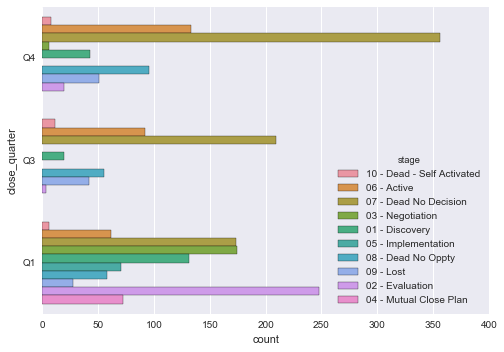

In [42]:
sns.plt.show()